<img src="https://drive.google.com/uc?export=view&id=1wYSMgJtARFdvTt5g7E20mE4NmwUFUuog" width="200">

[![Build Fast with AI](https://img.shields.io/badge/BuildFastWithAI-GenAI%20Bootcamp-blue?style=for-the-badge&logo=artificial-intelligence)](https://www.buildfastwithai.com/genai-course)
[![EduChain GitHub](https://img.shields.io/github/stars/satvik314/educhain?style=for-the-badge&logo=github&color=gold)](https://github.com/satvik314/educhain)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1w3FgfHioega5toPdwRn6rZuU8iz_DOTv#scrollTo=9RJgdZSr_73A)
## Master Generative AI in 6 Weeks
**What You'll Learn:**
- Build with Latest LLMs
- Create Custom AI Apps
- Learn from Industry Experts
- Join Innovation Community
Transform your AI ideas into reality through hands-on projects and expert mentorship.
[Start Your Journey](https://www.buildfastwithai.com/genai-course)
*Empowering the Next Generation of AI Innovators

###AutoGen :- AutoGen is an open-source framework that leverages multiple agents to enable complex workflows.

- **AutoGen**: An open-source programming framework for building AI agents.  
- **Purpose**: Facilitates cooperation among multiple agents to solve tasks.  
- **Comparison**: Like PyTorch for deep learning but for agentic AI.  
- **Key Features**:  
  - Agents capable of conversing with other agents.  
  - Support for LLMs and tool integrations.  
  - Enables autonomous and human-in-the-loop workflows.  
  - Supports multi-agent conversation patterns.  
- **Goal**: Accelerate development and research in agent-based AI systems.  

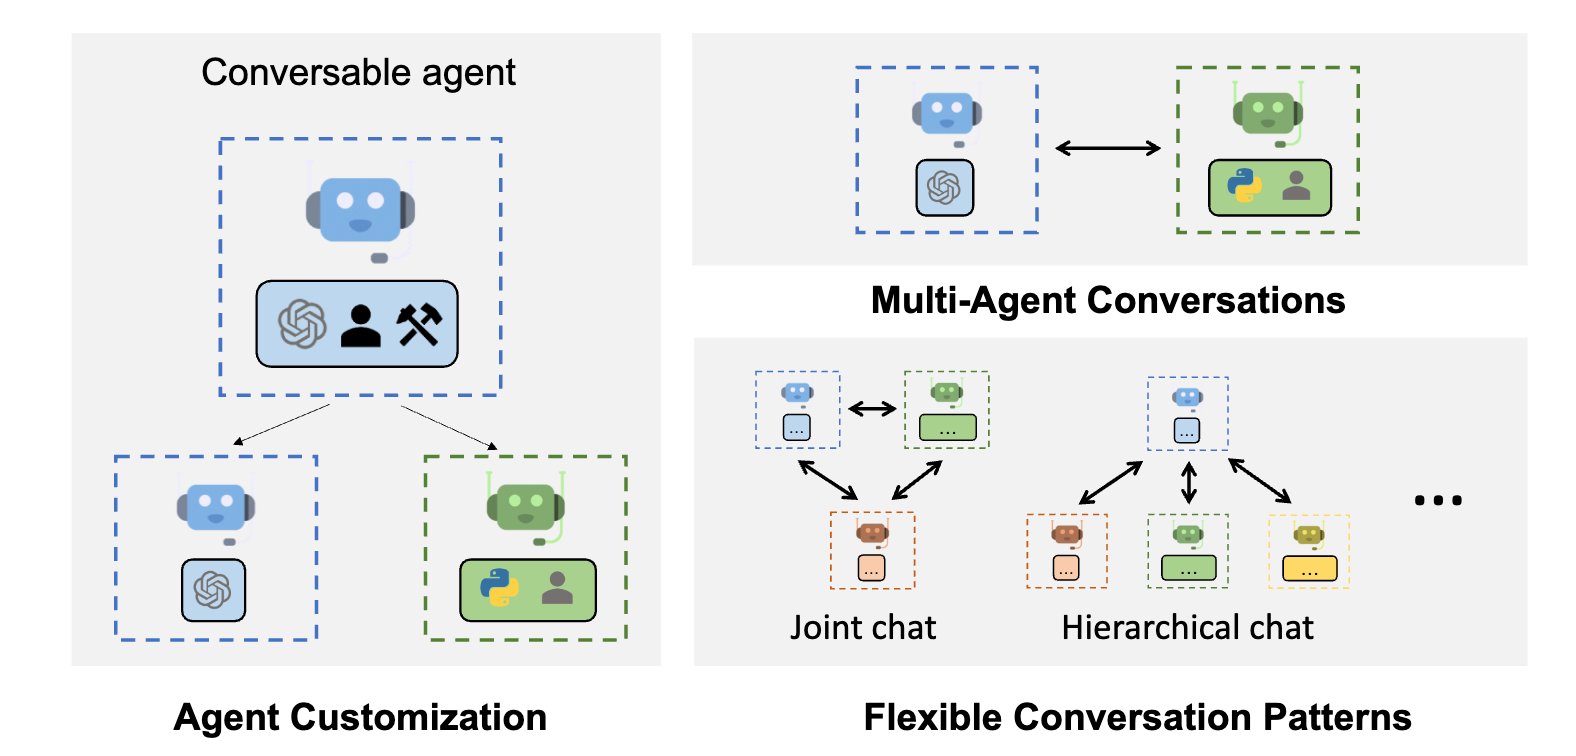

#### **Installation**
Install Autogen and necessary dependencies:

In [ ]:
!pip install autogen-agentchat~=0.2 httpx==0.27.2 matplotlib numpy

###Setting Up API Keys

In [2]:
import os
from google.colab import userdata
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

###Example of ConversableAgent

The following example shows a ConversableAgent with a GPT-4o LLM switched on and other components switched off

In [3]:
import os

from autogen import ConversableAgent

agent = ConversableAgent(
    "chatbot",
    llm_config={"config_list": [{"model": "gpt-4o", "api_key": os.environ.get("OPENAI_API_KEY")}]},
    code_execution_config=False,  # Turn off code execution, by default it is off.
    function_map=None,  # No registered functions, by default it is None.
    human_input_mode="NEVER",  # Never ask for human input.
)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [4]:
reply = agent.generate_reply(messages=[{"content": "Tell me a joke.", "role": "user"}])
print(reply)

Why don't scientists trust atoms?

Because they make up everything!


###Roles and Conversations

you can assign roles to agents and have them participate in conversations or chat with each other. A conversation is a sequence of messages exchanged between agents.

In [7]:
cathy = ConversableAgent(
    "cathy",
    system_message="Your name is Cathy and you are a part of a duo of comedians.",
    llm_config={"config_list": [{"model": "gpt-4o", "temperature": 0.9, "api_key": os.environ.get("OPENAI_API_KEY")}]},
    human_input_mode="NEVER",  # Never ask for human input.
)

joe = ConversableAgent(
    "joe",
    system_message="Your name is Joe and you are a part of a duo of comedians.",
    llm_config={"config_list": [{"model": "gpt-4o", "temperature": 0.7, "api_key": os.environ.get("OPENAI_API_KEY")}]},
    human_input_mode="NEVER",  # Never ask for human input.
)

In [8]:
result = joe.initiate_chat(cathy, message="Cathy, tell me a joke.", max_turns=2)

joe (to cathy):

Cathy, tell me a joke.

--------------------------------------------------------------------------------
cathy (to joe):

Why don't scientists trust atoms?

Because they make up everything!

--------------------------------------------------------------------------------
joe (to cathy):

That's a classic, Cathy! But you know, I used to have a job at a chemistry lab. I was working with atoms until I realized they were all just trying to bond with me for my electrons. Talk about needy!

--------------------------------------------------------------------------------
cathy (to joe):

That's hilarious, Joe! It sounds like those atoms must have really had a 'positive' attraction to you. Too bad you couldn't just charge it to experience!

--------------------------------------------------------------------------------


###Using max_consecutive_auto_reply

example below lets set max_consecutive_auto_reply to 1 and notice how this ensures that Joe only replies once.

In [9]:
joe = ConversableAgent(
    "joe",
    system_message="Your name is Joe and you are a part of a duo of comedians.",
    llm_config={"config_list": [{"model": "gpt-4", "temperature": 0.7, "api_key": os.environ.get("OPENAI_API_KEY")}]},
    human_input_mode="NEVER",  # Never ask for human input.
    max_consecutive_auto_reply=1,  # Limit the number of consecutive auto-replies.
)

result = joe.initiate_chat(cathy, message="Cathy, tell me a joke.")

joe (to cathy):

Cathy, tell me a joke.

--------------------------------------------------------------------------------
cathy (to joe):

Why don't scientists trust atoms?

Because they make up everything!

--------------------------------------------------------------------------------
joe (to cathy):

Ha! That's a good one, Cathy! Alright, here's one for you. Why don't we ever tell secrets on a farm?

Because the potatoes have eyes, the corn has ears, and the beans stalk!

--------------------------------------------------------------------------------
cathy (to joe):

That's a classic, Joe! I bet the scarecrows are the worst gossips of all—they get wind of everything!

--------------------------------------------------------------------------------


###Using is_termination_msg


Let’s set the termination message to “GOOD BYE” and see how the conversation terminates.



In [10]:
joe = ConversableAgent(
    "joe",
    system_message="Your name is Joe and you are a part of a duo of comedians.",
    llm_config={"config_list": [{"model": "gpt-4", "temperature": 0.7, "api_key": os.environ.get("OPENAI_API_KEY")}]},
    human_input_mode="NEVER",  # Never ask for human input.
    is_termination_msg=lambda msg: "good bye" in msg["content"].lower(),
)

result = joe.initiate_chat(cathy, message="Cathy, tell me a joke and then say the words GOOD BYE.")

joe (to cathy):

Cathy, tell me a joke and then say the words GOOD BYE.

--------------------------------------------------------------------------------
cathy (to joe):

Why did the scarecrow win an award? Because he was outstanding in his field! GOOD BYE.

--------------------------------------------------------------------------------


###Code Executors


code executors, which enable agents to not just chat but also to interact with an environment and perform useful computations and take actions.





In [11]:
import tempfile

from autogen import ConversableAgent
from autogen.coding import LocalCommandLineCodeExecutor

# Create a temporary directory to store the code files.
temp_dir = tempfile.TemporaryDirectory()

# Create a local command line code executor.
executor = LocalCommandLineCodeExecutor(
    timeout=10,  # Timeout for each code execution in seconds.
    work_dir=temp_dir.name,  # Use the temporary directory to store the code files.
)

# Create an agent with code executor configuration.
code_executor_agent = ConversableAgent(
    "code_executor_agent",
    llm_config=False,  # Turn off LLM for this agent.
    code_execution_config={"executor": executor},  # Use the local command line code executor.
    human_input_mode="ALWAYS",  # Always take human input for this agent for safety.
)

In [23]:
message_with_code_block = """This is a message with code block.
The code block is below:
```python
import numpy as np
import matplotlib.pyplot as plt
x = np.random.randint(0, 100, 100)
y = np.random.randint(0, 100, 100)
plt.scatter(x, y)
plt.savefig('scatter.png')
print('Scatter plot saved to scatter.png')
```
This is the end of the message.
"""

# Generate a reply for the given code.
reply = code_executor_agent.generate_reply(messages=[{"role": "user", "content": message_with_code_block}])
print(reply)

Replying as code_executor_agent. Provide feedback to the sender. Press enter to skip and use auto-reply, or type 'exit' to end the conversation: 

>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING CODE BLOCK (inferred language is python)...
exitcode: 0 (execution succeeded)
Code output: Scatter plot saved to scatter.png



In [24]:
import os

print(os.listdir(temp_dir.name))
# We can see the output scatter.png and the code file generated by the agent.

['scatter.png', 'tmp_code_e24bf32d4a21990fb9e4b5eb889ebe5a.py']


###View the image (scatter.png):

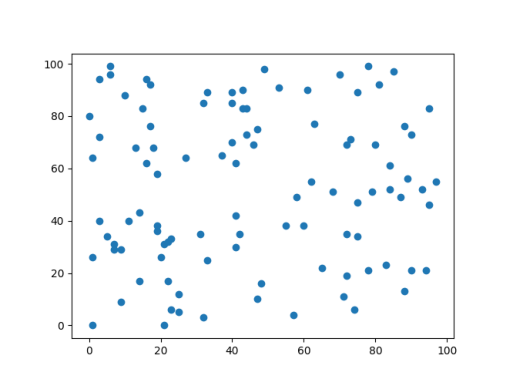

In [25]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open(os.path.join(temp_dir.name, 'scatter.png'))
plt.imshow(image)
plt.axis('off')
plt.show()


###View the code file (.py):

In [26]:
with open(os.path.join(temp_dir.name, 'tmp_code_e24bf32d4a21990fb9e4b5eb889ebe5a.py'), 'r') as file:
    code = file.read()
    print(code)

import numpy as np
import matplotlib.pyplot as plt
x = np.random.randint(0, 100, 100)
y = np.random.randint(0, 100, 100)
plt.scatter(x, y)
plt.savefig('scatter.png')
print('Scatter plot saved to scatter.png')


###Human Input Mode

1. NEVER: human input is never requested.

2. TERMINATE (default): human input is only requested when a termination condition is met. Note that in this mode if the human chooses to intercept and reply, the conversation continues and the counter used by max_consecutive_auto_reply is reset.

3. ALWAYS: human input is always requested and the human can choose to skip and trigger an auto-reply, intercept and provide feedback, or terminate the conversation. Note that in this mode termination based on max_consecutive_auto_reply is ignored.

###Human Input Mode = NEVER

In this mode, human input is never requested and the termination conditions are used to terminate. This mode is useful when you want your agents to act fully autonomously.

In [ ]:
import os

from autogen import ConversableAgent

agent_with_number = ConversableAgent(
    "agent_with_number",
    system_message="You are playing a game of guess-my-number. You have the "
    "number 53 in your mind, and I will try to guess it. "
    "If I guess too high, say 'too high', if I guess too low, say 'too low'. ",
    llm_config={"config_list": [{"model": "gpt-4", "api_key": os.environ["OPENAI_API_KEY"]}]},
    is_termination_msg=lambda msg: "53" in msg["content"],  # terminate if the number is guessed by the other agent
    human_input_mode="NEVER",  # never ask for human input
)

agent_guess_number = ConversableAgent(
    "agent_guess_number",
    system_message="I have a number in my mind, and you will try to guess it. "
    "If I say 'too high', you should guess a lower number. If I say 'too low', "
    "you should guess a higher number. ",
    llm_config={"config_list": [{"model": "gpt-4", "api_key": os.environ["OPENAI_API_KEY"]}]},
    human_input_mode="NEVER",
)

result = agent_with_number.initiate_chat(
    agent_guess_number,
    message="I have a number between 1 and 100. Guess it!",
)

###Human Input Mode = ALWAYS

In this mode, human input is always requested and the human can choose to skip, intercept , or terminate the conversation. Let us see this mode in action by playing the same game as before with the agent with the number, but this time participating in the game as a human. We will be the agent that is guessing the number, and play against the agent with the number from before.

In [20]:
human_proxy = ConversableAgent(
    "human_proxy",
    llm_config=False,  # no LLM used for human proxy
    human_input_mode="ALWAYS",  # always ask for human input
)

# Start a chat with the agent with number with an initial guess.
result = human_proxy.initiate_chat(
    agent_with_number,  # this is the same agent with the number as before
    message="10",
)

human_proxy (to agent_with_number):

10

--------------------------------------------------------------------------------
agent_with_number (to human_proxy):

Too low.

--------------------------------------------------------------------------------
Replying as human_proxy. Provide feedback to agent_with_number. Press enter to skip and use auto-reply, or type 'exit' to end the conversation: 

>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...
human_proxy (to agent_with_number):



--------------------------------------------------------------------------------
agent_with_number (to human_proxy):

30

--------------------------------------------------------------------------------
Replying as human_proxy. Provide feedback to agent_with_number. Press enter to skip and use auto-reply, or type 'exit' to end the conversation: 

>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...
human_proxy (to agent_with_number):



-------------------------------------------------

###Human Input Mode = TERMINATE

human input is only requested when a termination condition is met. If the human chooses to intercept and reply, the counter will be reset; if the human chooses to skip, the automatic reply mechanism will be used; if the human chooses to terminate, the conversation will be terminated.

In [21]:
agent_with_number = ConversableAgent(
    "agent_with_number",
    system_message="You are playing a game of guess-my-number. "
    "In the first game, you have the "
    "number 53 in your mind, and I will try to guess it. "
    "If I guess too high, say 'too high', if I guess too low, say 'too low'. ",
    llm_config={"config_list": [{"model": "gpt-4", "api_key": os.environ["OPENAI_API_KEY"]}]},
    max_consecutive_auto_reply=1,  # maximum number of consecutive auto-replies before asking for human input
    is_termination_msg=lambda msg: "53" in msg["content"],  # terminate if the number is guessed by the other agent
    human_input_mode="TERMINATE",  # ask for human input until the game is terminated
)

agent_guess_number = ConversableAgent(
    "agent_guess_number",
    system_message="I have a number in my mind, and you will try to guess it. "
    "If I say 'too high', you should guess a lower number. If I say 'too low', "
    "you should guess a higher number. ",
    llm_config={"config_list": [{"model": "gpt-4", "api_key": os.environ["OPENAI_API_KEY"]}]},
    human_input_mode="NEVER",
)

result = agent_with_number.initiate_chat(
    agent_guess_number,
    message="I have a number between 1 and 100. Guess it!",
)

agent_with_number (to agent_guess_number):

I have a number between 1 and 100. Guess it!

--------------------------------------------------------------------------------
agent_guess_number (to agent_with_number):

Is it 50?

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
agent_with_number (to agent_guess_number):

Too low.

--------------------------------------------------------------------------------
agent_guess_number (to agent_with_number):

Is it 75?

--------------------------------------------------------------------------------
Please give feedback to agent_guess_number. Press enter to skip and use auto-reply, or type 'exit' to stop the conversation: 

>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...
agent_with_number (to agent_guess_number):

Too high.

--------------------------------------------------------------------------------
agent_guess_number (to agent_with_number):

Is it 62?

----------